In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def load_img():
    blank_img = np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300),fontFace=font, fontScale=5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img
    

In [10]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [11]:
img = load_img()

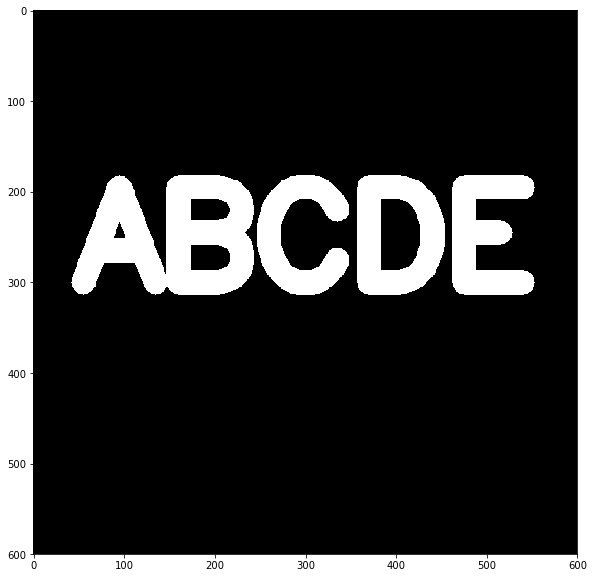

In [13]:
display_img(img)

In [24]:
# Erosion
# Erodes away boundaries of foreground objects. Works best when foreground is 
# light color (preferrably white) and background is dark.

kernel = np.ones((5,5),np.uint8)
erosion1 = cv2.erode(img,kernel,iterations=1)

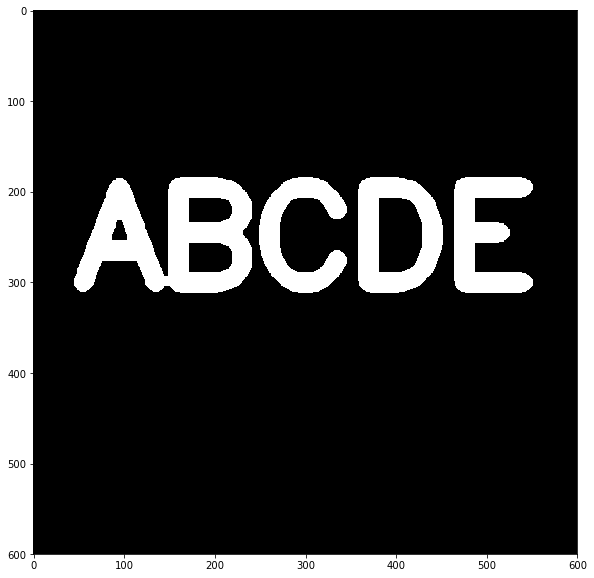

In [25]:
display_img(erosion1)

In [26]:
img = load_img()
kernel = np.ones((5,5),np.uint8)
erosion4 = cv2.erode(img,kernel,iterations=4)

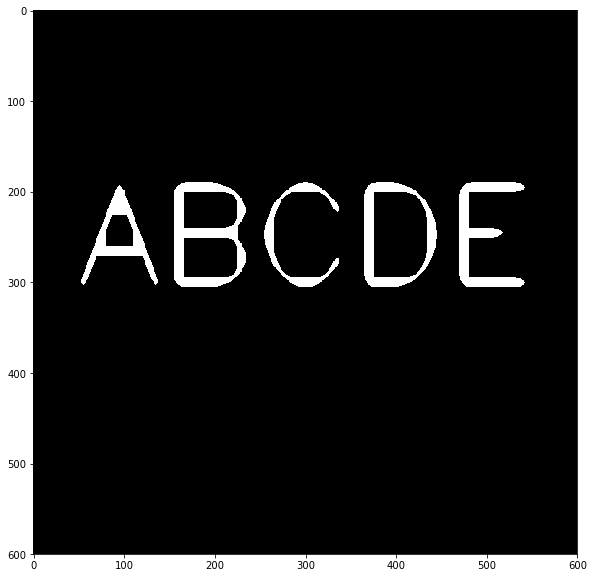

In [27]:
display_img(erosion4)

In [28]:
# Opening
# Opening is erosion followed by dilation. Useful in removing background noise!
img = load_img()

In [29]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [30]:
white_noise

array([[0, 1, 0, ..., 1, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 0]])

In [31]:
white_noise = white_noise*255

In [32]:
white_noise.shape

(600, 600)

In [34]:
img.shape

(600, 600)

In [35]:
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [36]:
noise_img = white_noise+img

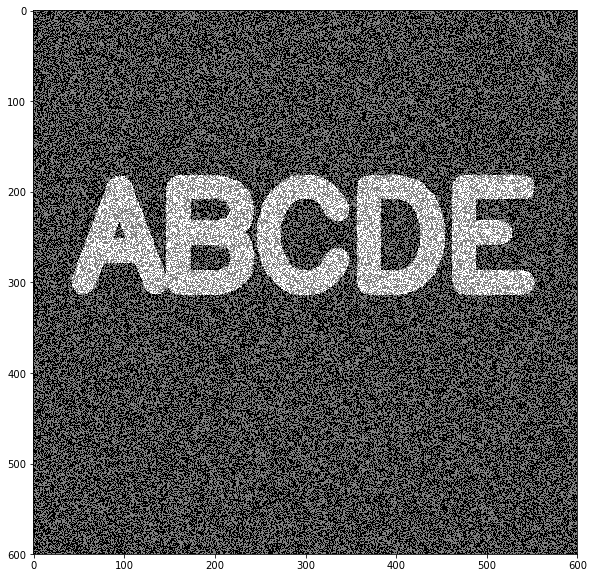

In [37]:
display_img(noise_img)

In [38]:
opening = cv2.morphologyEx(noise_img,cv2.MORPH_OPEN,kernel)

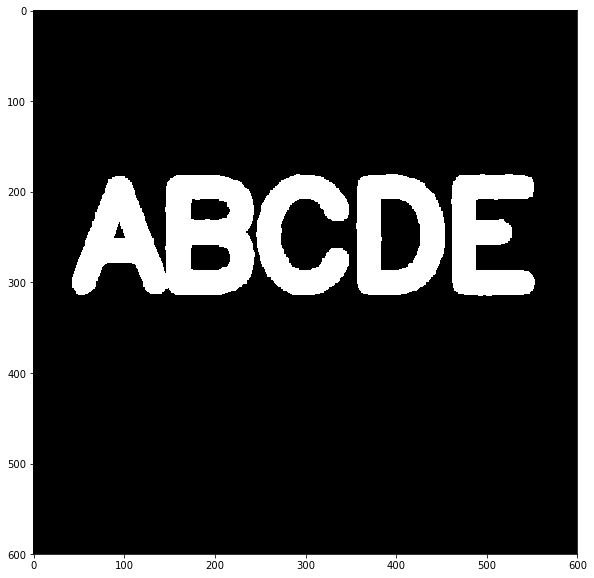

In [39]:
display_img(opening)

In [ ]:
# Closing
# Useful in removing noise from foreground objects, such as black dots on top of the white text.

In [40]:
img = load_img()

In [41]:
black_noise = np.random.randint(low=0,high=2,size=(600,600))

In [42]:
black_noise

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [1, 0, 0, ..., 0, 1, 1],
       [1, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 1]])

In [43]:
black_noise= black_noise * -255

In [44]:
black_noise_img = img + black_noise

In [45]:
black_noise_img

array([[   0., -255., -255., ...,    0.,    0.,    0.],
       [   0., -255.,    0., ..., -255., -255.,    0.],
       [   0.,    0., -255., ...,    0., -255., -255.],
       ...,
       [-255.,    0.,    0., ...,    0., -255., -255.],
       [-255.,    0.,    0., ..., -255.,    0.,    0.],
       [-255.,    0., -255., ...,    0.,    0., -255.]])

In [46]:
black_noise_img[black_noise_img==-255] = 0

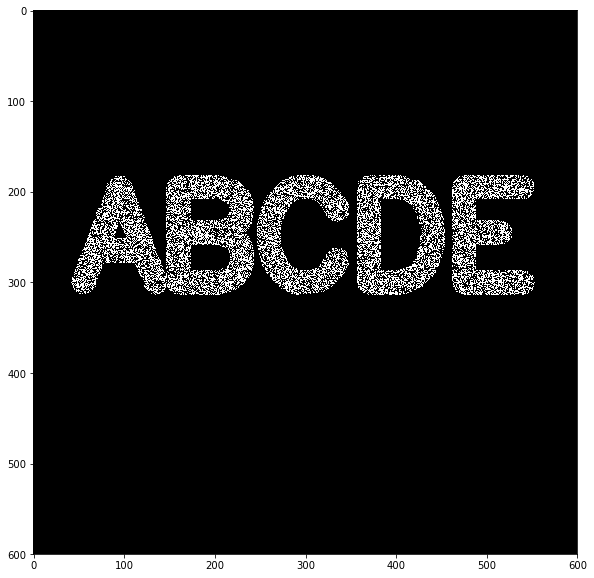

In [47]:
display_img(black_noise_img)

In [48]:
closing = cv2.morphologyEx(black_noise_img,cv2.MORPH_CLOSE,kernel)

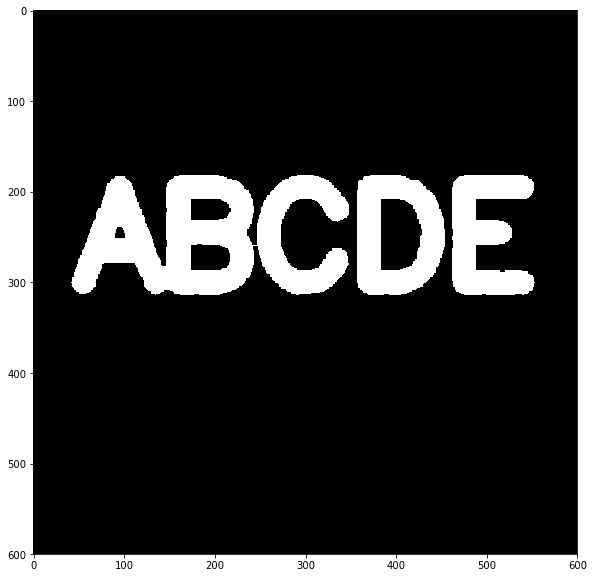

In [49]:
display_img(closing)

In [50]:
# Morphological Gradient
# Difference between dilation and erosion of an image.

In [51]:
img = load_img()

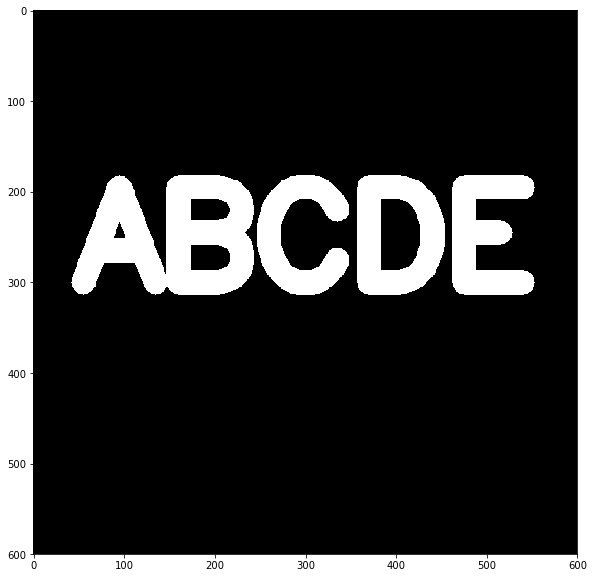

In [52]:
display_img(img)

In [53]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

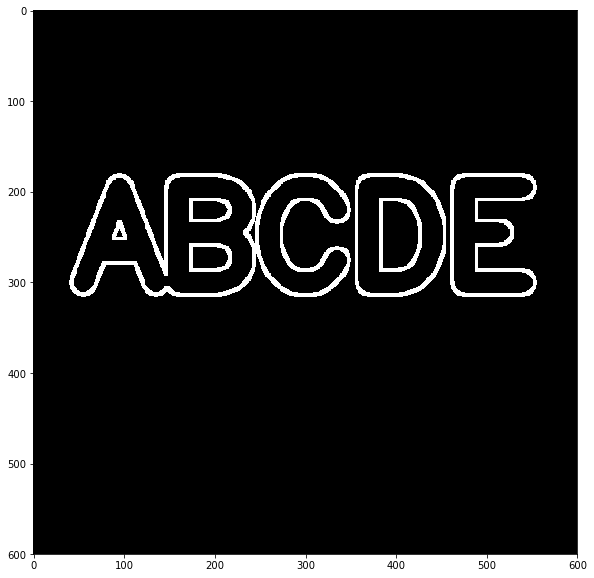

In [54]:
display_img(gradient)